## The simple way

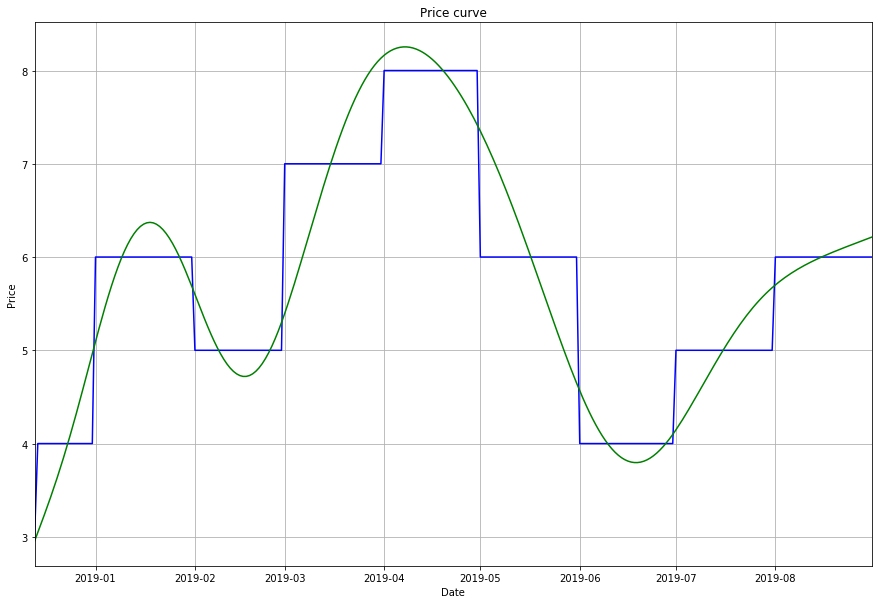

In [2]:
from curvy import builder, plot
import datetime
start_date = datetime.datetime.now()
forward_prices = [3, 4, 6, 5, 7, 8, 6, 4, 5, 6]
x, y, dr, pr, y_smfc = builder.build_smfc_curve(forward_prices, start_date)
fig, ax = plot.mpl_create_curve_plot(x)
plot.mpl_plot_curves(x, y, fig, ax, (x, y_smfc, 'green', '-'))

## Building our x-axis index variables

In [3]:
from curvy import axis, plot, builder
import datetime

# Define the starting date we want to contruct the forward curve from
start_date = datetime.datetime.now()
forward_prices = [3, 4, 6, 5, 7, 8, 6, 4, 5, 6]

In [4]:
# First we need the dates representing our x-axis
dr = axis.date_ranges(start_date, 8)
x = axis.flatten_ranges(dr)

In [5]:
# We get the unsmooth forward price for each step
pr = axis.price_ranges(dr, forward_prices)
y = axis.flatten_ranges(pr)

## Building the curve parameters

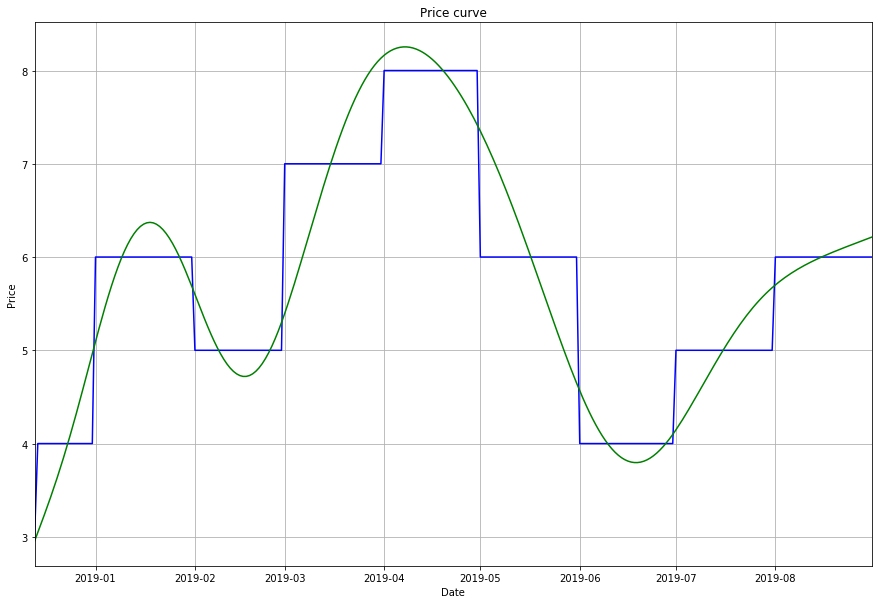

In [6]:
taus = axis.start_end_absolute_index(dr, overlap=1)
knots = axis.knot_index(taus)
H = builder.calc_big_H(taus)
A = builder.calc_big_A(knots, taus)
B = builder.calc_B(forward_prices, taus)
X = builder.solve_lineq(H, A, B)

y_smfc = builder.curve_values(dr, X, builder.smfc, flatten=True)
fig, ax = plot.mpl_create_curve_plot(x)
plot.mpl_plot_curves(x, y, fig, ax, (x, y_smfc, 'green', '-'))

### Showing only the segments

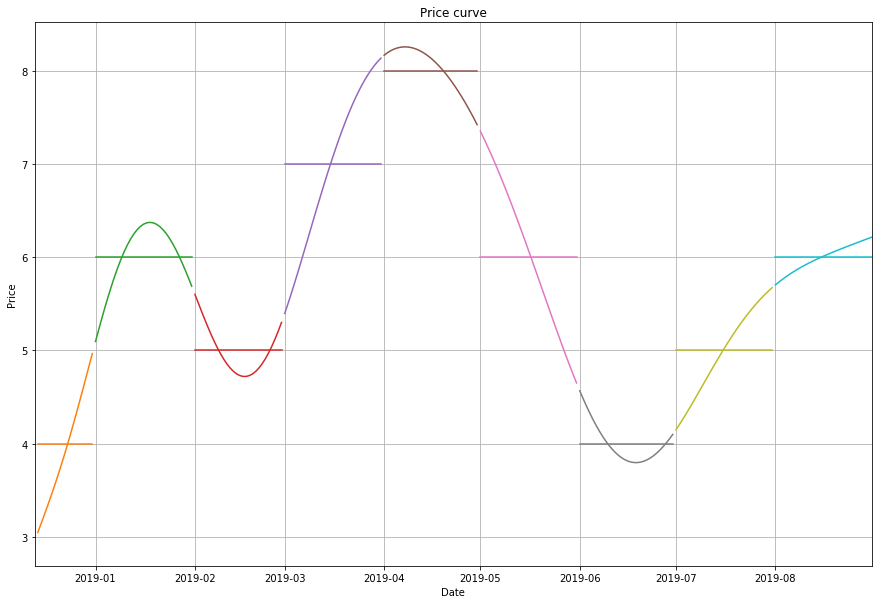

In [7]:
y_smfc = builder.curve_values(dr, X, builder.smfc)
fig, ax = plot.mpl_create_curve_plot(x)
plot.mpl_plot_curve_sections(x, y, fig, ax, (dr, y_smfc), (dr, pr), hide_price=True)

## Or customize your own plots

In [8]:
from scipy.interpolate import interp1d
import numpy as np

start_date = datetime.datetime.now()
forward_prices = [3, 4, 6, 5, 7, 8, 6, 4, 5, 6]
fig, ax = plot.mpl_create_curve_plot(x)

x, y, dr, pr, y_smfc = builder.build_smfc_curve(forward_prices, start_date)
pr_mv = axis.midpoint_values(pr, include_last=True)
dr_mai = axis.midpoint_absolute_index(dr, include_last=True)
f_simple = interp1d(dr_mai, pr_mv)
f_cubic = interp1d(dr_mai, pr_mv, kind='cubic')

# We need to convert the indices from dates to numbers
x_i = np.arange(0, len(x))

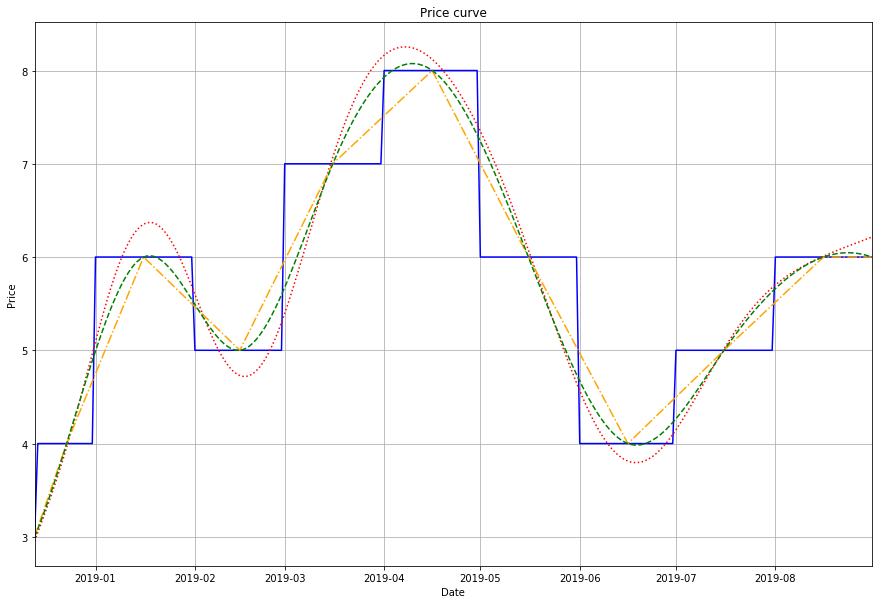

In [9]:
plot.mpl_plot_curves(
    x, y, fig, ax,
    (x, y_smfc, 'red', ':'),
    (x, f_simple(x_i), 'orange', '-.'),
    (x, f_cubic(x_i), 'green', '--'),
)